## IDEA : Identify and Classify Documents by topic
`Names:`
    - Abdelfattah Mohamed
    - Abdelrahman Ali 
    -Tariq Yahya
    - Aya Alaa
    - Gehad Radwan
    

> `Description of our idea:`
    we will use dataset scrapped from Makeup site and make classification on it.
    Dataset : https://github.com/aniass/Extracting-data-using-API or
              https://www.kaggle.com/oftomorrow/herokuapp-makeup-products
    Site Scrapped : http://makeup-api.herokuapp.com/

### 01) Importing packages and loading data

In [1]:
# MATH LIBRARIES
import pandas as pd
import numpy as np
# NLP LIBRARIES
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# SPLITTING DATA
from sklearn.model_selection import train_test_split
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# Confusion matrix, Report, Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('Desktop/products_final.csv')
df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


### 02) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    931 non-null    int64  
 1   brand         919 non-null    object 
 2   category      507 non-null    object 
 3   currency      368 non-null    object 
 4   description   906 non-null    object 
 5   id            931 non-null    int64  
 6   name          931 non-null    object 
 7   price         917 non-null    float64
 8   price_sign    368 non-null    object 
 9   product_type  931 non-null    object 
 10  rating        340 non-null    float64
 11  tag_list      931 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 87.4+ KB


In [4]:
# copying df to text_df to work on it
text_df = df.copy()
text_df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


In [5]:
# The size of dataset
text_df.shape

(931, 12)

In [6]:
text_df['description'][5]

'Serum Foundations are lightweight medium-coverage formulations available in a comprehensive shade range across 21 shades. These foundations offer moderate coverage that looks natural with a very lightweight serum feel. They are very low in viscosity and are dispensed with the supplied pump or with the optional glass dropper available for purchase separately if preferred. '

In [7]:
# Check missing values ?
text_df.isnull().sum()

Unnamed: 0        0
brand            12
category        424
currency        563
description      25
id                0
name              0
price            14
price_sign      563
product_type      0
rating          591
tag_list          0
dtype: int64

In [8]:
# Data type change:
text_df['description'] = text_df['description'].astype(str)

In [9]:
# Lenght of characters
text_df['length'] = text_df['description'].apply(len)
text_df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list,length
0,0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']",232
1,1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']",146
2,2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']",188
3,3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']",492
4,4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']",357


In [10]:
# MAYBE WILL MAKE THIS OUR CATEGORIES "CLASSES"
text_df.product_type.unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [11]:
# Statistics
text_df['length'].describe()

count     931.000000
mean      625.640172
std       816.640434
min         3.000000
25%       207.000000
50%       342.000000
75%       675.000000
max      5516.000000
Name: length, dtype: float64

In [12]:
# Count values for each class
text_df.product_type.value_counts()

foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
Name: product_type, dtype: int64

In [13]:
'''
Grouping data with similar names
'''
text_df.loc[text_df['product_type'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'product_type'] = 'eye_makeup'
text_df.loc[text_df['product_type'].isin(['blush','bronzer']),'product_type'] = 'contour'
text_df.loc[text_df['product_type'].isin(['lipstick','lip_liner']),'product_type'] = 'lipstick'

In [14]:
#Check 
'''
After run this cell we will have five group of classes:
Eye makeup 
Lipstick
Foundation
Contour
Nail polish
'''
text_df.product_type.value_counts()

eye_makeup     375
lipstick       183
foundation     166
contour        147
nail_polish     60
Name: product_type, dtype: int64

In [15]:
# Mapping data to numeric data for learning
df_mapping = {
    'eye_makeup': 1,
    'lipstick': 2,
    'foundation': 3,
    'contour': 4,
    'nail_polish': 5}

In [16]:
# Applying
text_df['product_type'] = text_df['product_type'].map(df_mapping)
text_df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list,length
0,0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,2,NaN,"['Vegan', 'cruelty free']",232
1,1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,2,NaN,"['Vegan', 'cruelty free']",146
2,2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,2,NaN,"['Vegan', 'cruelty free']",188
3,3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,3,NaN,"['Vegan', 'cruelty free']",492
4,4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,2,NaN,"['Organic', 'Chemical Free']",357


In [17]:
# Statisics for types
text_df.groupby('product_type').describe()

Unnamed: 0                                                        \
                  count        mean         std    min     25%    50%     75%   
product_type                                                                    
1                 375.0  494.349333  299.084679    7.0  243.50  457.0  741.50   
2                 183.0  449.737705  283.983375    0.0  187.50  380.0  830.50   
3                 166.0  376.668675  216.358160    3.0  202.25  351.5  606.75   
4                 147.0  418.210884  159.677081   13.0  340.50  489.0  525.50   
5                  60.0  687.133333  214.869489  295.0  782.75  797.5  812.25   

                        id              ... rating      length              \
                max  count        mean  ...    75%  max  count        mean   
product_type                            ...                                  
1             930.0  375.0  497.712000  ...    4.8  5.0  375.0  651.048000   
2             876.0  183.0  551.808743  ...    5.0  5.0  183.0  536.814208   
3             648.0  166.0  632.777108  ...    4.7  5.0  166.0  652.524096   
4             689.0  147.0  579.972789  ...    5.0  5.0  147.0  686.503401   
5             827.0   60.0  276.550000  ...    5.0  5.0   60.0  514.266667   

                                                              
                     std   min    25%    50%     75%     max  
product_type                                                  
1             838.703069   3.0  207.5  336.0   737.5  5458.0  
2             820.086345   3.0  174.5  302.0   526.0  5516.0  
3             926.370387   3.0  225.0  342.0   562.5  4806.0  
4             754.843750   3.0  228.0  398.0  1077.0  5350.0  
5             340.863801  95.0  212.5  546.5   786.0  1252.0  

[5 rows x 40 columns]

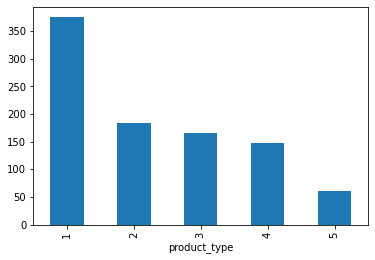

In [18]:
# SIMPLE VISUALIZATION 
text_df.groupby('product_type').description.count().plot.bar(ylim=0)
plt.show()

### 03) Text Pre-processing


> 1- Removing punctions

In [19]:
'''
remove_punctuation method
'''
def remove_punctuation(description):
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

In [20]:
# Applying
text_df['description'] = text_df['description'].apply(remove_punctuation)
text_df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list,length
0,0,colourpop,pencil,CAD,Lippie Pencil A longwearing and highintensity ...,1048,Lippie Pencil,5.0,$,2,NaN,"['Vegan', 'cruelty free']",232
1,1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,2,NaN,"['Vegan', 'cruelty free']",146
2,2,colourpop,lipstick,CAD,Lippie Stix Formula contains Vitamin E Mango A...,1046,Lippie Stix,5.5,$,2,NaN,"['Vegan', 'cruelty free']",188
3,3,colourpop,liquid,CAD,Developed for the Selfie Age our buildable ful...,1045,No Filter Foundation,12.0,$,3,NaN,"['Vegan', 'cruelty free']",492
4,4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,2,NaN,"['Organic', 'Chemical Free']",357


> 2- Stop words


In [21]:
# stopwords showing
stop = stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
'''
remove_stopwords method
'''
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [23]:
# Applying
text_df['description'] = text_df['description'].apply(remove_stopwords)
text_df.tail()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list,length
926,926,pacifica,NaN,NaN,fall love pacificas long lasting nourishing na...,5,Pacifica Stellar Gaze Length & Strength Minera...,28.00,NaN,1,4.2,"['Vegan', 'Natural']",1025
927,927,physicians formula,NaN,NaN,physicians formula organic wear fakeout mascar...,4,Physicians Formula Organic Wear FakeOut Mascara,15.79,NaN,1,3.9,"['Gluten Free', 'Natural']",1320
928,928,physicians formula,NaN,NaN,physicians formula organic wear lash boosting ...,3,Physicians Formula Organic Wear Lash Boosting ...,15.79,NaN,1,3.7,"['Gluten Free', 'Natural']",1830
929,929,NaN,NaN,NaN,voluminous volume building waterproof mascara’...,2,L' Oreal Paris Voluminous Mascara,9.99,NaN,1,4.5,[],936
930,930,pure anada,NaN,NaN,finally natural mascara feel good putting lash...,1,Pure Anada Natural Mascara,14.00,NaN,1,4.6,"['Canadian', 'Gluten Free', 'Natural']",631


In [24]:
# Test
text_df['description'][5]

'serum foundations lightweight mediumcoverage formulations available comprehensive shade range across 21 shades foundations offer moderate coverage looks natural lightweight serum feel low viscosity dispensed supplied pump optional glass dropper available purchase separately preferred'

> 3- Stemming


In [25]:
porter = PorterStemmer()
'''
Stemmer method
'''
def stemmer(stem_text):
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [26]:
# Applying
text_df['description'] = text_df['description'].apply(stemmer)
text_df.head()

,Unnamed: 0,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list,length
0,0,colourpop,pencil,CAD,lippi pencil longwear highintens lip pencil gl...,1048,Lippie Pencil,5.0,$,2,NaN,"['Vegan', 'cruelty free']",232
1,1,colourpop,lipstick,CAD,blot lip sheer matt lipstick creat perfect pop...,1047,Blotted Lip,5.5,$,2,NaN,"['Vegan', 'cruelty free']",146
2,2,colourpop,lipstick,CAD,lippi stix formula contain vitamin e mango avo...,1046,Lippie Stix,5.5,$,2,NaN,"['Vegan', 'cruelty free']",188
3,3,colourpop,liquid,CAD,develop selfi age buildabl full coverag natur ...,1045,No Filter Foundation,12.0,$,3,NaN,"['Vegan', 'cruelty free']",492
4,4,boosh,lipstick,CAD,product free lead heavi metal paraben phthalat...,1044,Lipstick,26.0,$,2,NaN,"['Organic', 'Chemical Free']",357


In [27]:
# Checking
text_df['description'][5]

'serum foundat lightweight mediumcoverag formul avail comprehens shade rang across 21 shade foundat offer moder coverag look natur lightweight serum feel low viscos dispens suppli pump option glass dropper avail purchas separ prefer'

> 4- Part of Speech Tagging


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gogo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# Testing only
tokens = text_df['description'][5]

nltk.pos_tag(word_tokenize(tokens))

[('serum', 'NN'),
 ('foundat', 'NN'),
 ('lightweight', 'VBD'),
 ('mediumcoverag', 'NNS'),
 ('formul', 'JJ'),
 ('avail', 'NN'),
 ('comprehens', 'NNS'),
 ('shade', 'VBD'),
 ('rang', 'NN'),
 ('across', 'IN'),
 ('21', 'CD'),
 ('shade', 'NN'),
 ('foundat', 'NN'),
 ('offer', 'NN'),
 ('moder', 'NN'),
 ('coverag', 'NN'),
 ('look', 'NN'),
 ('natur', 'JJ'),
 ('lightweight', 'JJ'),
 ('serum', 'NN'),
 ('feel', 'NN'),
 ('low', 'JJ'),
 ('viscos', 'NN'),
 ('dispens', 'VBZ'),
 ('suppli', 'JJ'),
 ('pump', 'NN'),
 ('option', 'NN'),
 ('glass', 'NN'),
 ('dropper', 'NN'),
 ('avail', 'NN'),
 ('purchas', 'NN'),
 ('separ', 'NN'),
 ('prefer', 'VBP')]

> 4- Bag of words
    - CountVectorizer 

In [30]:
'''
COUNT VECTORIZER for ENCODING
'''
vectorizer = CountVectorizer()
vectorizer.fit(text_df['description'])
vector = vectorizer.transform(text_df['description'])

In [31]:
print(vector.shape)
print(vector.toarray())

(931, 5892)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


> 5- TF-IDF
    - Term Frequency–Inverse Document Frequency

In [32]:
# extract tfid 
tfidf_converter = TfidfTransformer()
df_x_tfidf = tfidf_converter.fit_transform(vector).toarray()
df_x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 04) Splitting Data 

In [33]:
X = df_x_tfidf
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698, 5892), (233, 5892), (698,), (233,))

### 05) Build the model

    - The problem: Multi-classification
    - Algorthims: Logistic Regression.

> 5.1) Logistic Regression


In [35]:
LR_Model_log = LogisticRegression()
LR_Model_log.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Preparing sets using numpy
ytest = np.array(y_test)
pred = LR_Model_log.predict(X_test)

### 06) Confusion Matrix & Classification Report

In [37]:
print('ACCURACY : %s \n' % accuracy_score(pred, y_test))


ACCURACY : 0.8669527896995708 



In [38]:
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           1       0.80      0.99      0.88        91
           2       1.00      0.84      0.92        45
           3       0.84      0.78      0.81        40
           4       0.94      0.78      0.85        40
           5       1.00      0.71      0.83        17

    accuracy                           0.87       233
   macro avg       0.91      0.82      0.86       233
weighted avg       0.88      0.87      0.87       233



In [39]:
print(confusion_matrix(ytest, pred))

[[90  0  0  1  0]
 [ 6 38  1  0  0]
 [ 9  0 31  0  0]
 [ 4  0  5 31  0]
 [ 4  0  0  1 12]]


In [40]:
# save the model to disk
import pickle
filename = 'LR_model.sav'
pickle.dump(LR_Model_log, open(filename, 'wb'))

In [41]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8669527896995708


  5.2) SVM

In [42]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
print('ACCURACY : %s \n' % metrics.accuracy_score(y_test, y_pred))

ACCURACY : 0.9227467811158798 



In [44]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        91
           2       0.98      0.91      0.94        45
           3       0.89      0.85      0.87        40
           4       0.97      0.90      0.94        40
           5       0.94      0.94      0.94        17

    accuracy                           0.92       233
   macro avg       0.93      0.91      0.92       233
weighted avg       0.93      0.92      0.92       233



In [45]:
print(confusion_matrix(ytest, y_pred))

[[88  1  1  1  0]
 [ 3 41  0  0  1]
 [ 6  0 34  0  0]
 [ 1  0  3 36  0]
 [ 1  0  0  0 16]]


5.3)  Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
clff=RandomForestClassifier(n_estimators=100)
clff.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred=clff.predict(X_test)
print('ACCURACY : %s \n' % metrics.accuracy_score(y_test, y_pred))

ACCURACY : 0.9012875536480687 



In [48]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.97      0.91        91
           2       1.00      0.78      0.88        45
           3       0.87      0.82      0.85        40
           4       0.97      0.93      0.95        40
           5       0.89      1.00      0.94        17

    accuracy                           0.90       233
   macro avg       0.92      0.90      0.90       233
weighted avg       0.91      0.90      0.90       233



In [49]:
print(confusion_matrix(ytest, y_pred))

[[88  0  2  1  0]
 [ 7 35  1  0  2]
 [ 7  0 33  0  0]
 [ 1  0  2 37  0]
 [ 0  0  0  0 17]]


### End of PROJECT